In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.options.display.max_rows = 10

In [3]:
allyears = pd.read_json('allyears.json')

In [4]:
totals = allyears.groupby(['sex', 'name']).number.sum()

In [5]:
totals

sex  name     
F    Aabha        35
     Aabidah       5
     Aabriella    38
     Aada         13
     Aadaya        8
                  ..
M    Zyus         11
     Zyvion        5
     Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: number, Length: 109173, dtype: int64

In [10]:
male, female = totals.loc['M'], totals.loc['F']

In [7]:
male

name
Aaban     114
Aabid      16
Aabir      10
Aadam     273
Aadan     130
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: number, Length: 41475, dtype: int64

In [11]:
female

name
Aabha        35
Aabidah       5
Aabriella    38
Aada         13
Aadaya        8
             ..
Zyrielle     27
Zyrihanna    45
Zyriyah      16
Zyva         23
Zyyanna       6
Name: number, Length: 67698, dtype: int64

In [12]:
totals.loc['M'] / totals.loc['F'] < 2

name
Aaban      False
Aabha      False
Aabid      False
Aabidah    False
Aabir      False
           ...  
Zyvion     False
Zyvon      False
Zyyanna    False
Zyyon      False
Zzyzx      False
Name: number, Length: 98400, dtype: bool

In [21]:
ratios = (totals.loc['M'] / totals.loc['F']).dropna()

In [22]:
ratios[(ratios > 0.5) & (ratios < 2)]

name
Aalijah    1.422819
Aamari     1.430233
Aari       1.111111
Aarin      1.950331
Aaris      1.000000
             ...   
Ziyan      1.251748
Zoel       1.928571
Zohar      0.520270
Zyian      0.714286
Zyrie      0.842105
Name: number, Length: 1660, dtype: float64

In [23]:
unisex = ratios[(ratios > 0.5) & (ratios < 2)].index

In [25]:
unisex

Index(['Aalijah', 'Aamari', 'Aari', 'Aarin', 'Aaris', 'Aaryn', 'Aavyn', 'Abey',
       'Abrar', 'Abriel',
       ...
       'Zell', 'Zi', 'Ziel', 'Zihan', 'Zixuan', 'Ziyan', 'Zoel', 'Zohar',
       'Zyian', 'Zyrie'],
      dtype='object', name='name', length=1660)

In [26]:
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)

In [27]:
common

name
Jessie     277674
Riley      201179
Casey      186947
Jackie     169199
Peyton     120657
Jaime      117885
Kerry       98195
Kendall     93317
Jody        86971
Frankie     74325
Name: number, dtype: int64

In [28]:
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

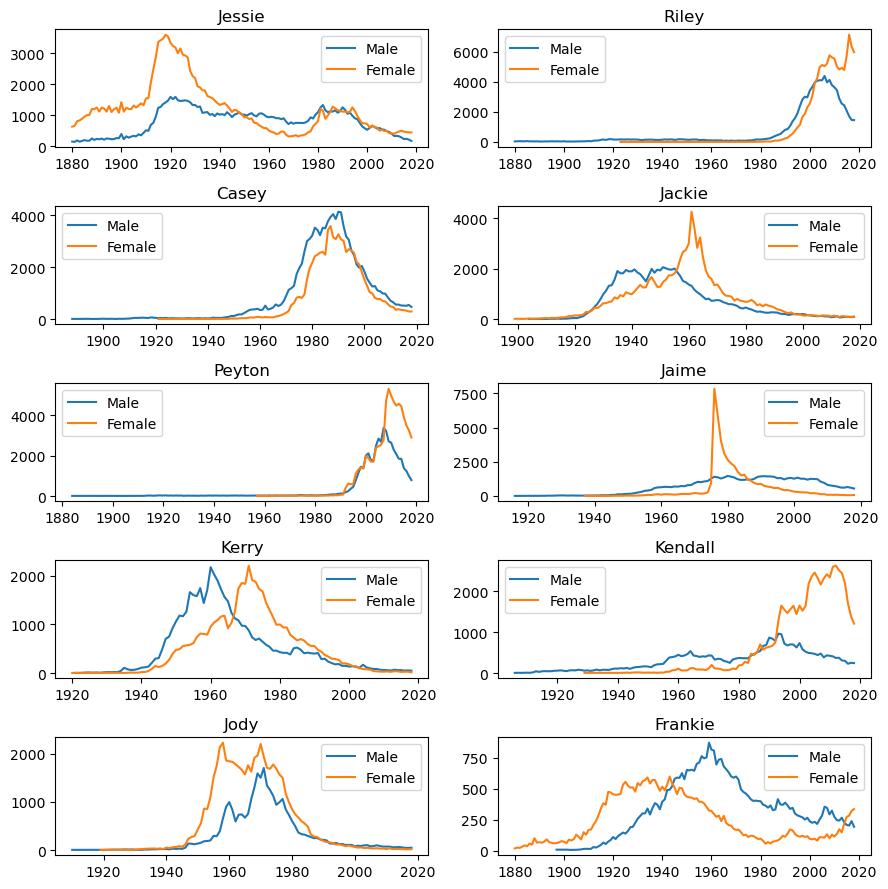

In [31]:
plt.figure(figsize=(9,9))

for i, name in enumerate(common.index):
    plt.subplot(5,2,i+1)
    
    plt.plot(allyears_indexed.loc['M', name], label='Male')
    plt.plot(allyears_indexed.loc['F', name], label='Female')

    plt.legend()
    plt.title(name)

plt.tight_layout()